In [41]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]


import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [42]:
data=pd.DataFrame(dataset)
data

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


C:\Users\H.A\AppData\Local\Temp\ipykernel_25624\2991625661.py:20: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  newdf.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Dress'}>,
        <AxesSubplot:title={'center':'Earrings'}>,
        <AxesSubplot:title={'center':'Hat'}>],
       [<AxesSubplot:title={'center':'Heels'}>,
        <AxesSubplot:title={'center':'Necklace'}>,
        <AxesSubplot:title={'center':'Pants'}>],
       [<AxesSubplot:title={'center':'Sandals'}>,
        <AxesSubplot:title={'center':'Scarf'}>,
        <AxesSubplot:title={'center':'Shirt'}>],
       [<AxesSubplot:title={'center':'Skirt'}>,
        <AxesSubplot:title={'center':'Sneakers'}>,
        <AxesSubplot:title={'center':'Sunglasses'}>]], dtype=object)

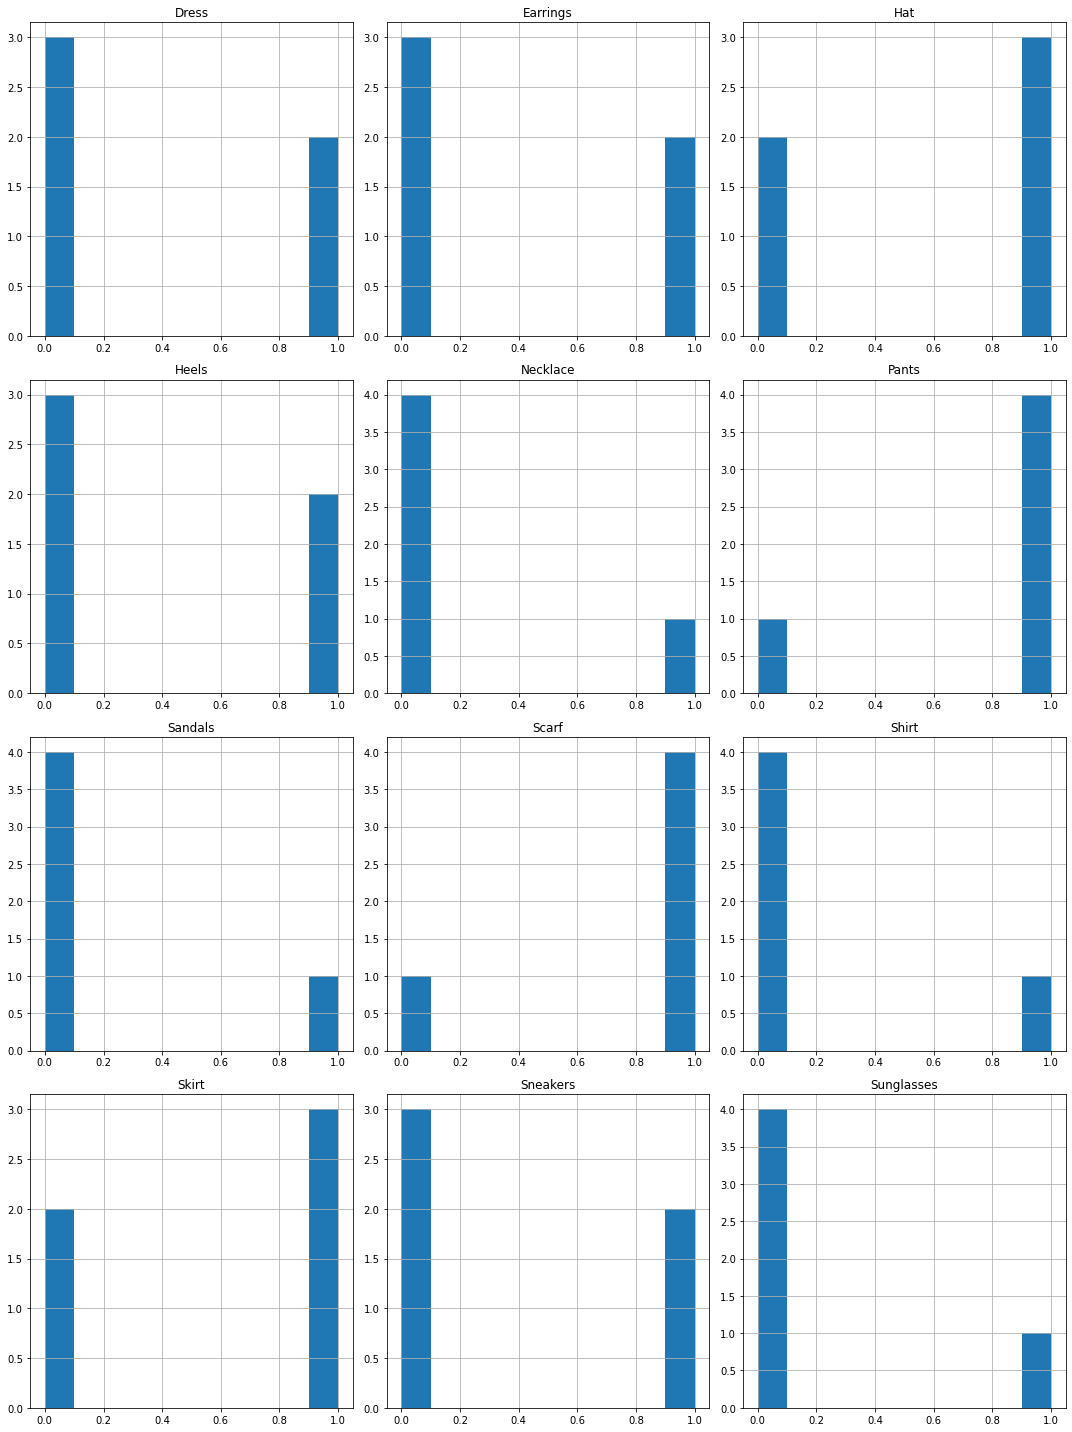

In [43]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
newdf=df
newdf['Dress']=encoder.fit_transform(newdf['Dress'])
newdf['Earrings']=encoder.fit_transform(newdf['Earrings'])
newdf['Hat']=encoder.fit_transform(newdf['Hat'])
newdf['Heels']=encoder.fit_transform(newdf['Heels'])
newdf['Necklace']=encoder.fit_transform(newdf['Necklace'])
newdf['Pants']=encoder.fit_transform(newdf['Pants'])
newdf['Sandals']=encoder.fit_transform(newdf['Sandals'])
newdf['Scarf']=encoder.fit_transform(newdf['Scarf'])
newdf['Shirt']=encoder.fit_transform(newdf['Shirt'])
newdf['Skirt']=encoder.fit_transform(newdf['Skirt'])
newdf['Sneakers']=encoder.fit_transform(newdf['Sneakers'])
newdf['Sunglasses']=encoder.fit_transform(newdf['Sunglasses'])

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
newdf.hist(ax = ax)

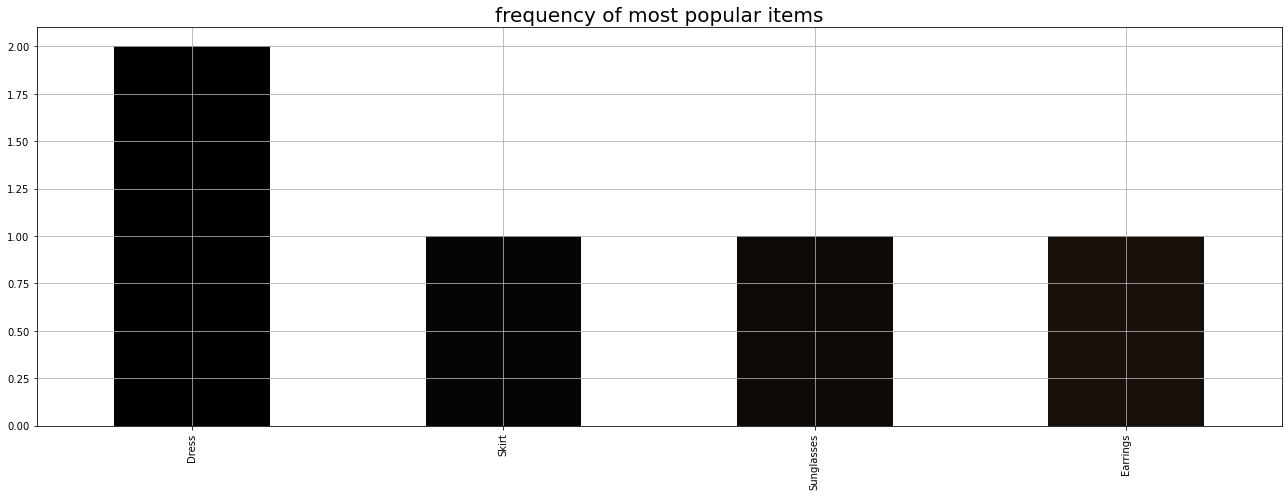

In [44]:
import numpy as np
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [45]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

C:\Users\H.A\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [46]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

C:\Users\H.A\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [47]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [48]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.25,0.12,inf
1,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.25,0.12,1.6


In [49]:
print('we can put shirt near to pants')

we can put shirt near to pants
